<a href="https://colab.research.google.com/github/ramprasad-nnr/AndriodAppAnalysis/blob/main/Project_ICAIML_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna
!pip install catboost
!pip install lightgbm

     |████████████████████████████████| 308 kB 4.4 MB/s 
     |████████████████████████████████| 210 kB 36.5 MB/s 
     |████████████████████████████████| 81 kB 8.5 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 113 kB 52.2 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 146 kB 54.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=a8ccf03bfd742ba3f53fcb90d1e692ccd410c4f64e7d76872d4a69ec08966c37
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 76.6 MB 55 kB/s 


In [2]:
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_auc_score
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn import tree
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
#https://towardsdatascience.com/styling-pandas-plots-and-charts-9b4721e9e597
plt.style.use("seaborn-bright")

import optuna


## Data Handling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#org_df = pd.read_csv('Google-Playstore.csv')

org_df = pd.read_csv("/content/drive/MyDrive/ICAIML/Google-Playstore.csv")

In [5]:
org_df.info(verbose=True, null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           2312942 non-null  object 
 1   App Id             2312944 non-null  object 
 2   Category           2312944 non-null  object 
 3   Rating             2290061 non-null  float64
 4   Rating Count       2290061 non-null  float64
 5   Installs           2312837 non-null  object 
 6   Minimum Installs   2312837 non-null  float64
 7   Maximum Installs   2312944 non-null  int64  
 8   Free               2312944 non-null  bool   
 9   Price              2312944 non-null  float64
 10  Currency           2312809 non-null  object 
 11  Size               2312748 non-null  object 
 12  Minimum Android    2306414 non-null  object 
 13  Developer Id       2312911 non-null  object 
 14  Developer Website  1552109 non-null  object 
 15  Developer Email    2312913 non-n

In [6]:
org_df.shape

(2312944, 24)

## EDA

In [7]:
org_df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [8]:
org_df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [9]:
org_df[org_df["Maximum Installs"] <= 10000].count()

App Name             1795721
App Id               1795722
Category             1795722
Rating               1774842
Rating Count         1774842
Installs             1795644
Minimum Installs     1795644
Maximum Installs     1795722
Free                 1795722
Price                1795722
Currency             1795622
Size                 1795541
Minimum Android      1790002
Developer Id         1795692
Developer Website    1174585
Developer Email      1795710
Released             1739533
Last Updated         1795722
Content Rating       1795722
Privacy Policy       1437596
Ad Supported         1795722
In App Purchases     1795722
Editors Choice       1795722
Scraped Time         1795722
dtype: int64

In [10]:
org_df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


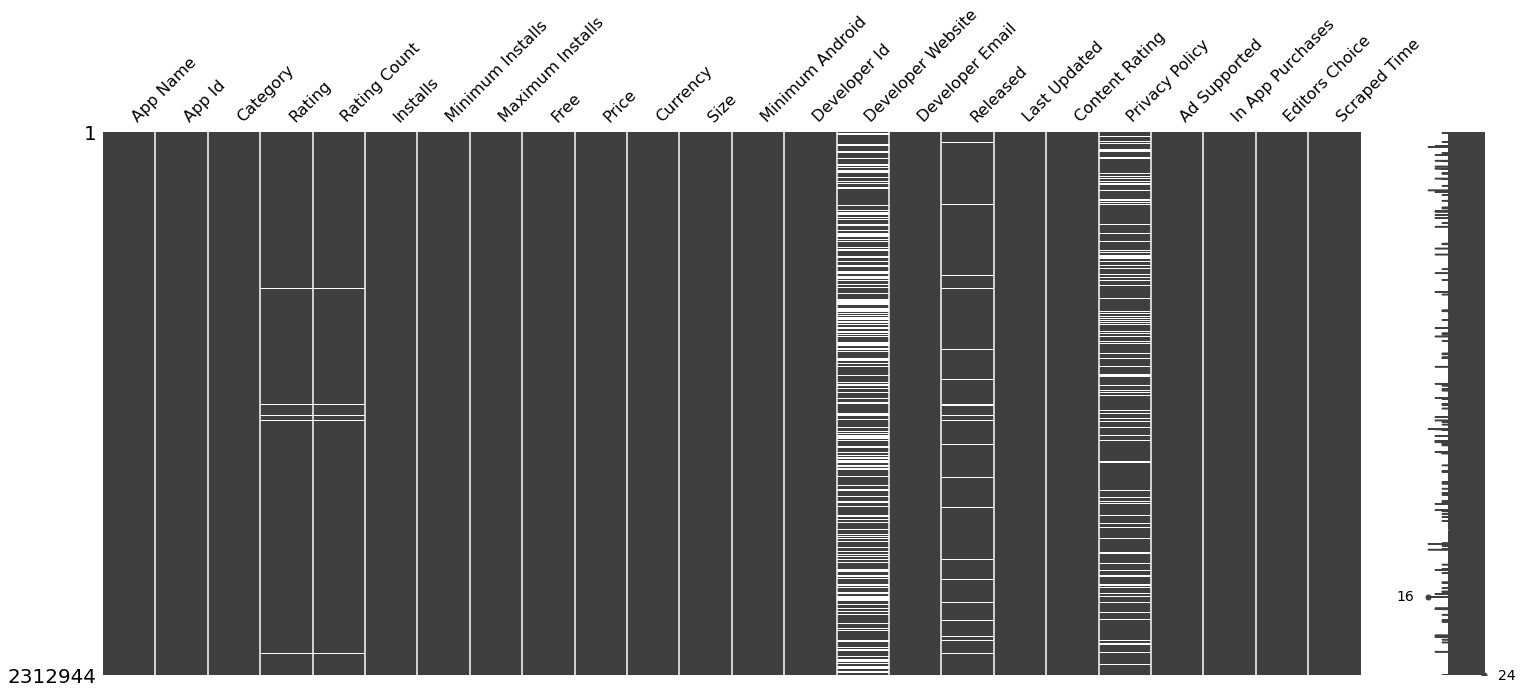

In [11]:
msno.matrix(org_df)

1) Multi-Class Classification Problem
    Drop: 'App Name', 'App Id', 'Rating', 'Rating Count','Installs', 'Minimum Installs',  'Free', 'Currency','Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Privacy Policy','Editors Choice',
       'Scraped Time', 'RatingType'

    Success Metric=> 'Maximum Installs'


    Index(['Category',  'Price', 'Size', 'Minimum Android', 'Developer Id', 'Content Rating', 'Ad Supported', 'In App Purchases',],

    Success Criteria
        Installs
            4 buckets: [Percentaile-Quartile]
        Rating ????
    

Data Cleaning:

    Remove all Apps with NON-USD Currency
2) Two Stage Classification


Text(0.5, 1.0, 'Distribution of Apps with Size')

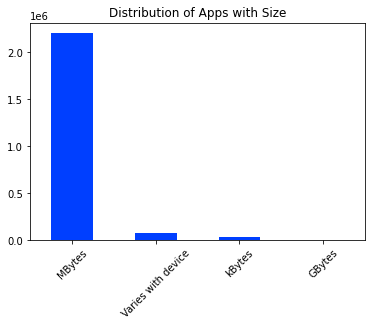

In [12]:
def check_size(x):
    if isinstance(x, str) and x.find("Varies") != -1:
        return x
    else:
        if isinstance(x, str):
            return x[-1]+"Bytes"
    return x
org_df["Size"].apply(lambda x: check_size(x)).value_counts().plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Distribution of Apps with Size")


## Data Handling

In [13]:
org_df["Size"].isnull().value_counts()

False    2312748
True         196
Name: Size, dtype: int64

In [14]:
#print(org_df.shape)

slim_org_df = org_df[org_df["Currency"] == "USD"]
#print(slim_org_df.shape)
slim_org_df = slim_org_df[slim_org_df["Size"] != "Varies with device"]

#print(slim_org_df.shape)

slim_org_df = slim_org_df[slim_org_df["Size"].notnull()]


def clean_size(x):
    if x.find(",") != -1:
        return x.split(",")[0]
    if x.find("G") != -1:
        return float(x[:-1])*1024*1024*1024
    elif x.find("M") != -1:
        return float(x[:-1])*1024*1024
    elif x.find("k") != -1:
        return float(x[:-1])*1024

    return x[:-1]

#slim_org_df["Size"] = slim_org_df["Size"].str.replace("[A-Za-z", "")
slim_org_df["Size"] = slim_org_df["Size"].apply(lambda x: float(clean_size(x)))

#print(slim_org_df.shape)

slim_org_df = slim_org_df.drop(['App Name', 'App Id', 'Rating', 'Rating Count', 'Installs',
                                'Minimum Installs', 'Free',  'Currency',
                                'Developer Website',
                                'Developer Email', 'Released', 'Last Updated', 
                                'Privacy Policy', 'Editors Choice',
                                'Scraped Time'], axis=1)

In [15]:
slim_org_df["success_metric"] = slim_org_df["Maximum Installs"].apply(lambda x: 1 if x >= 10000 else 0)

slim_org_df = slim_org_df.drop(["Maximum Installs"], axis=1)
slim_org_df["Size"] = slim_org_df["Size"]#.str.replace("[a-zA-Z]", "Ram")


In [16]:
sns

<module 'seaborn' from '/usr/local/lib/python3.7/dist-packages/seaborn/__init__.py'>

In [17]:
slim_org_df.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236674 entries, 0 to 2312943
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Category          2236674 non-null  object 
 1   Price             2236674 non-null  float64
 2   Size              2236674 non-null  float64
 3   Minimum Android   2230268 non-null  object 
 4   Developer Id      2236642 non-null  object 
 5   Content Rating    2236674 non-null  object 
 6   Ad Supported      2236674 non-null  bool   
 7   In App Purchases  2236674 non-null  bool   
 8   success_metric    2236674 non-null  int64  
dtypes: bool(2), float64(2), int64(1), object(4)
memory usage: 140.8+ MB


## EDA Next Step

In [18]:
slim_org_df["Size"].value_counts()


11534336.0     62120
12582912.0     56056
13631488.0     48010
14680064.0     45195
16777216.0     42443
               ...  
7782.4             1
910163968.0        1
606076928.0        1
368050176.0        1
536870912.0        1
Name: Size, Length: 1628, dtype: int64

In [19]:
slim_org_df

,Category,Price,Size,Minimum Android,Developer Id,Content Rating,Ad Supported,In App Purchases,success_metric
0,Adventure,0.0,10485760.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,0
1,Tools,0.0,3040870.4,5.0 and up,Webserveis,Everyone,True,False,0
2,Productivity,0.0,3879731.2,4.0.3 and up,Cabin Crew,Everyone,False,False,0
3,Communication,0.0,1887436.8,4.0.3 and up,Climate Smart Tech2,Everyone,True,False,0
4,Tools,0.0,6501171.2,4.1 and up,Rafal Milek-Horodyski,Everyone,False,False,0
...,...,...,...,...,...,...,...,...,...
2312939,Role Playing,0.0,80740352.0,4.1 and up,ALICE GAME,Teen,False,False,1
2312940,Education,0.0,46137344.0,4.1 and up,"3Dream Studios, LLC",Everyone,False,False,0
2312941,Education,0.0,30408704.0,5.0 and up,appoworld,Everyone,False,False,0
2312942,Music & Audio,0.0,10485760.0,5.0 and up,Bhakti,Everyone,True,False,0


In [20]:
# sns.histplot(data=slim_org_df.groupby(["Category", "success_metric"]).agg("count").reset_index(),
# x="Category", hue="success_metric")

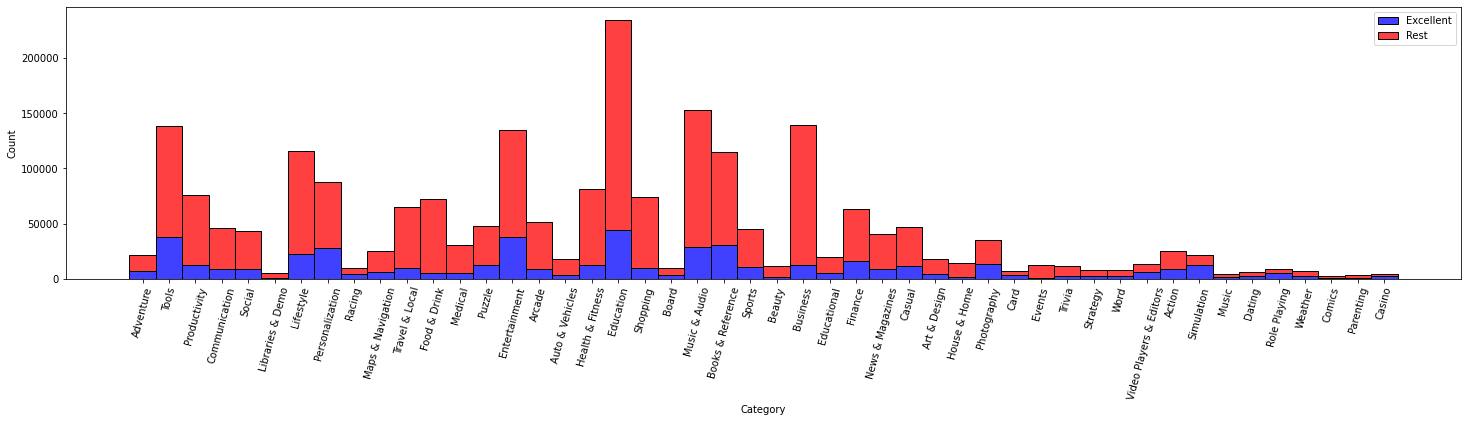

In [21]:
plt.rcParams["figure.figsize"] = (25, 5)
sns.histplot(data=slim_org_df, x="Category", hue="success_metric", palette=["red", "blue"], kde=False,multiple="stack")
test = plt.xticks(rotation=75)
plt.legend(["Excellent", "Rest"])

## EDA Extra

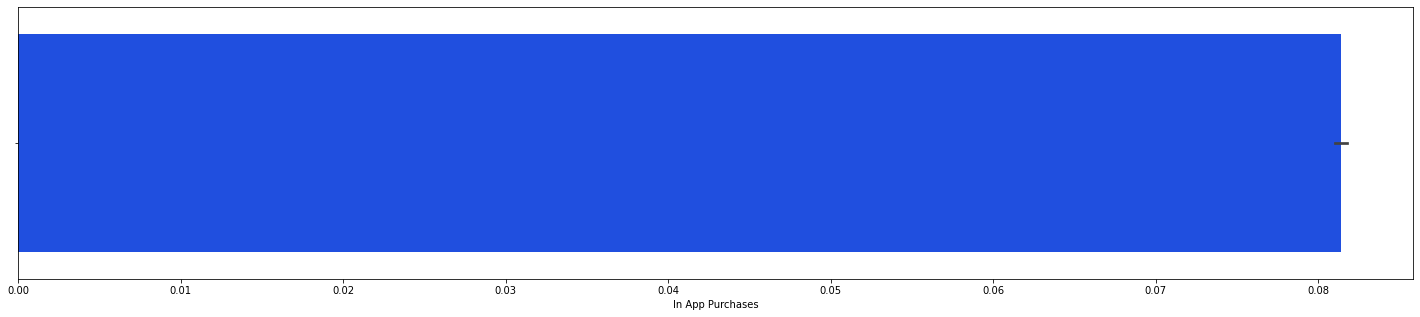

In [22]:
sns.barplot(data=slim_org_df, x="In App Purchases", hue="success_metric")

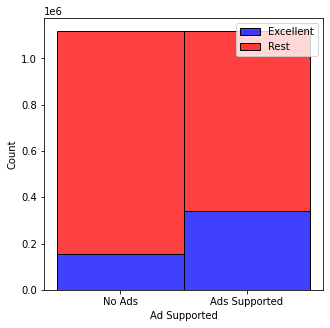

In [23]:
# plt.rcParams["figure.figsize"] = (10, )
plt.rcParams["figure.figsize"] = (5, 5)
slim_org_df['Ad Supported'] = pd.factorize(slim_org_df['Ad Supported'])[0].astype(str)
sns.histplot(data=slim_org_df, x="Ad Supported", hue="success_metric", palette=["red", "blue"], multiple="stack")
test = plt.xticks([0, 1], ["No Ads", "Ads Supported"])
plt.legend(["Excellent", "Rest"])

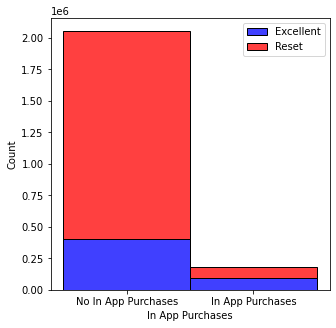

In [24]:
# plt.rcParams["figure.figsize"] = (10, )
plt.rcParams["figure.figsize"] = (5, 5)
slim_org_df['In App Purchases'] = pd.factorize(slim_org_df['In App Purchases'])[0].astype(str)
sns.histplot(data=slim_org_df, x="In App Purchases", hue="success_metric", palette=["red", "blue"], multiple="stack")
test = plt.xticks([0, 1], ["No In App Purchases", "In App Purchases"])
plt.legend(["Excellent", "Reset"])

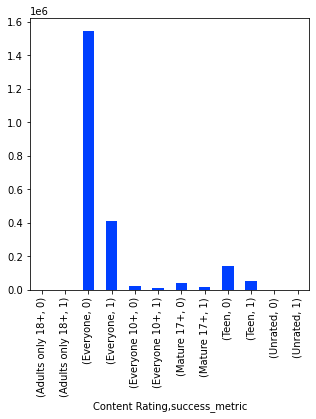

In [26]:
slim_org_df.groupby(["Content Rating", "success_metric"]).agg("count")["Category"].plot(kind="bar")

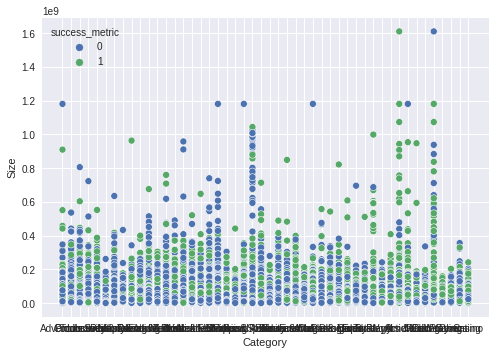

In [28]:
plt.style.use("seaborn")
columns  = ["Category", "Minimum Android", "Developer Id","Content Rating", "Ad Supported", "In App Purchases"]
#fig, ax = plt.subplots(len(columns), 2, figsize=(20,10))
i = 0

# for col in columns:
#     temp_df = slim_org_df[slim_org_df["success_metric"] == "Excellent"].groupby([col]).count()["success_metric"].reset_index()
#     sns.barplot(data=temp_df, ax=ax[i][0])
#     ax[i][0].set_title(col+"vs"+"Excellent")
#     temp_df = slim_org_df[slim_org_df["success_metric"] == "Bad"].groupby([col]).count()["success_metric"].reset_index()
#     sns.barplot(data=temp_df, ax=ax[i][0])
#     ax[i][0].set_title(col+"vs"+"Bad")

#     i += 1

# for col in columns:
#     temp_df = slim_org_df.groupby([col,"success_metric"]).count()["success_metric"].reset_index()
#     sns.barplot(data=temp_df, ax=ax[i][0])
#     ax[i][0].set_title(col+"vs"+"Excellent")


sns.scatterplot(data=slim_org_df, x="Category", y="Size", hue="success_metric")
    #slim_org_df[slim_org_df["success_metric"] == "Bad"].groupby([col]).count()["success_metric"].plot(kind="bar", ax=ax[0][0])


In [29]:
slim_org_df

,Category,Price,Size,Minimum Android,Developer Id,Content Rating,Ad Supported,In App Purchases,success_metric
0,Adventure,0.0,10485760.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,Everyone,0,0,0
1,Tools,0.0,3040870.4,5.0 and up,Webserveis,Everyone,1,0,0
2,Productivity,0.0,3879731.2,4.0.3 and up,Cabin Crew,Everyone,0,0,0
3,Communication,0.0,1887436.8,4.0.3 and up,Climate Smart Tech2,Everyone,1,0,0
4,Tools,0.0,6501171.2,4.1 and up,Rafal Milek-Horodyski,Everyone,0,0,0
...,...,...,...,...,...,...,...,...,...
2312939,Role Playing,0.0,80740352.0,4.1 and up,ALICE GAME,Teen,0,0,1
2312940,Education,0.0,46137344.0,4.1 and up,"3Dream Studios, LLC",Everyone,0,0,0
2312941,Education,0.0,30408704.0,5.0 and up,appoworld,Everyone,0,0,0
2312942,Music & Audio,0.0,10485760.0,5.0 and up,Bhakti,Everyone,1,0,0


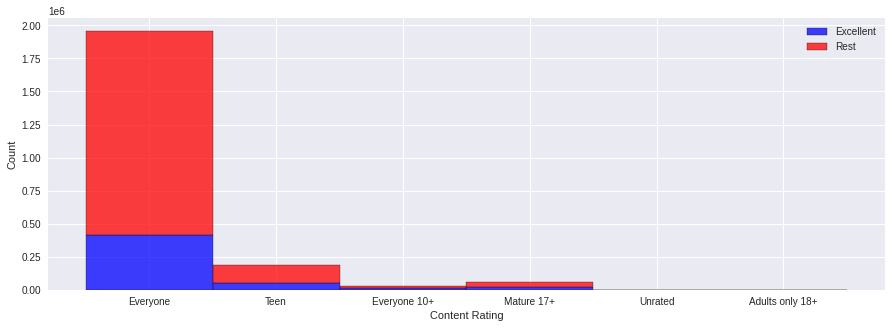

In [30]:
# plt.rcParams["figure.figsize"] = (10, )
plt.rcParams["figure.figsize"] = (15, 5)
#slim_org_df['Content Rating'] = pd.factorize(slim_org_df['Content Rating'])[0].astype(str)
sns.histplot(data=slim_org_df, x="Content Rating", hue="success_metric", palette=["red", "blue"], multiple="stack")
plt.legend(["Excellent", "Rest"])

In [31]:
org_df["Minimum Installs"]

0              10.0
1            5000.0
2              50.0
3              10.0
4             100.0
             ...   
2312939    100000.0
2312940       100.0
2312941       100.0
2312942      1000.0
2312943       100.0
Name: Minimum Installs, Length: 2312944, dtype: float64

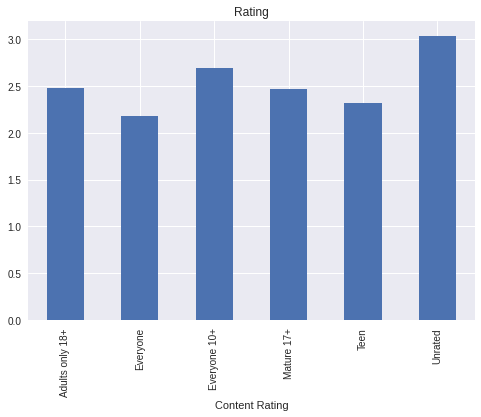

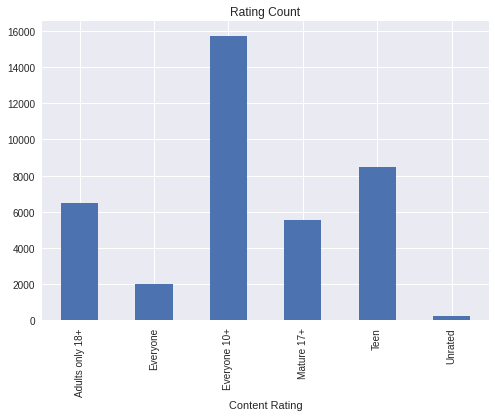

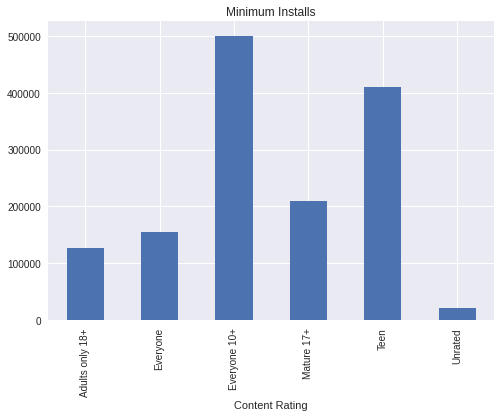

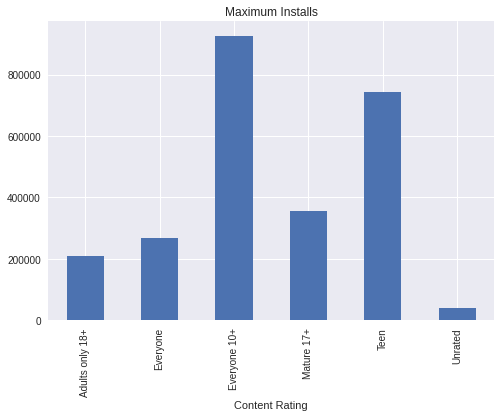

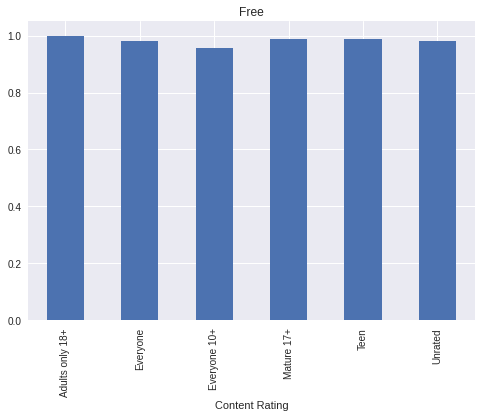

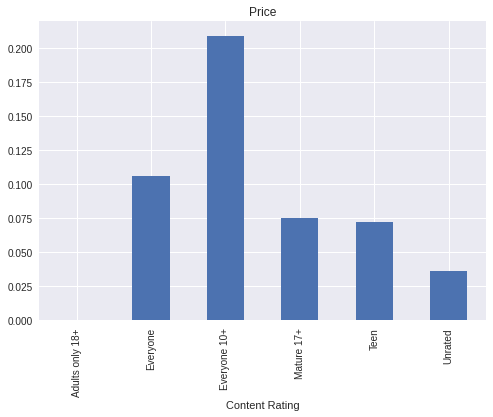

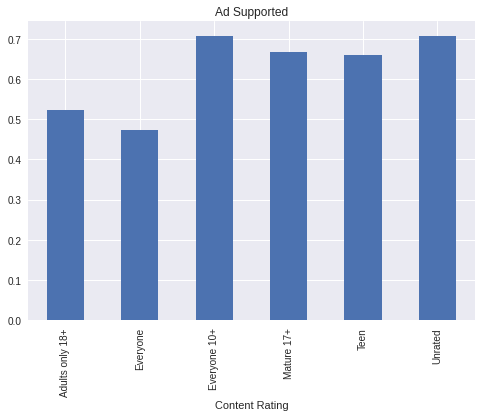

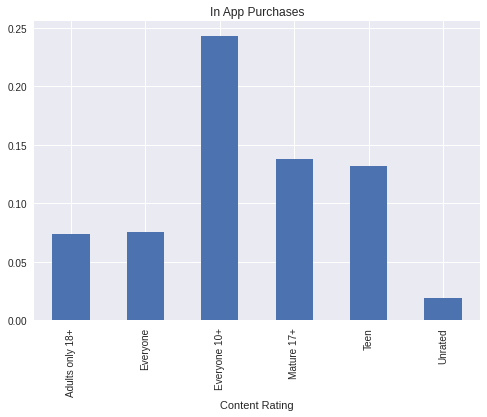

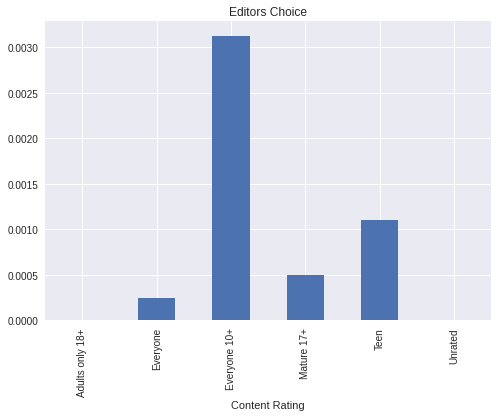

In [32]:
plt.style.use("seaborn")
df = org_df.groupby("Content Rating").agg("mean")#.plot(kind="bar")
for col in df.columns:
    df[col].plot(kind="bar")
    plt.title(col)
    plt.show()

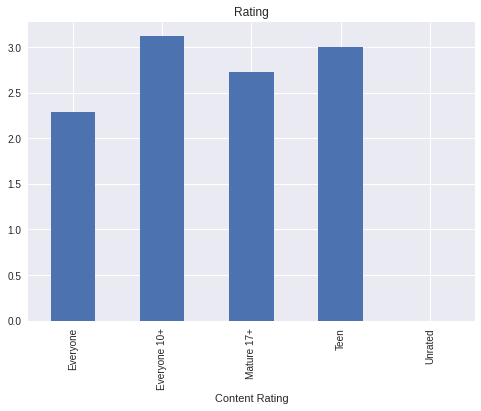

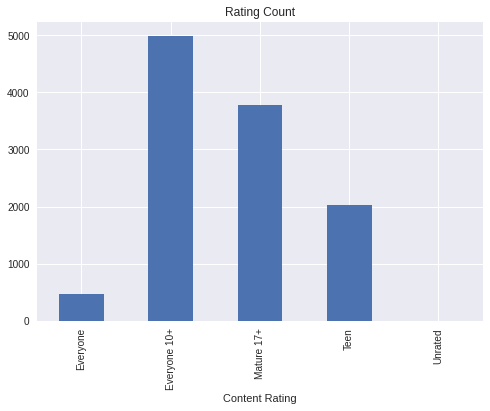

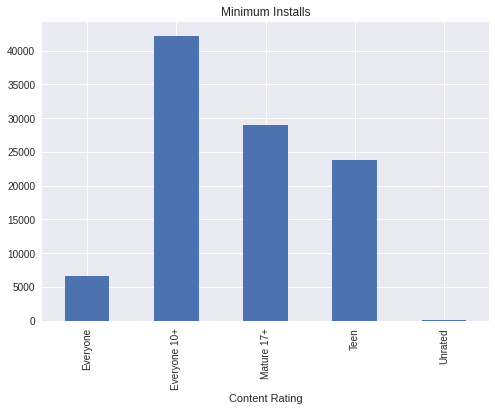

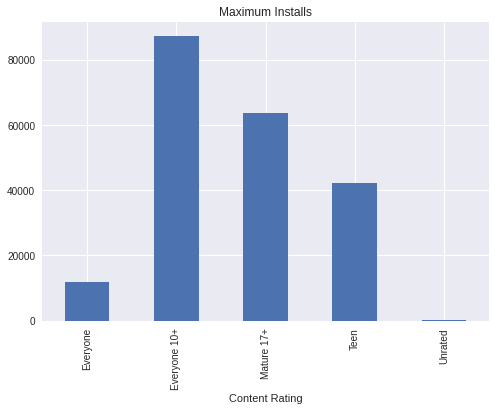

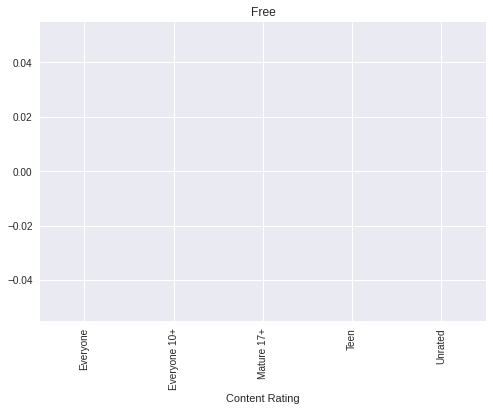

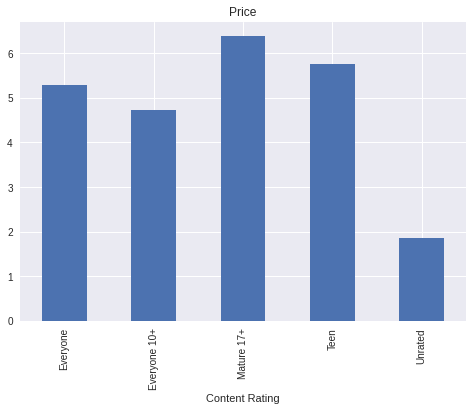

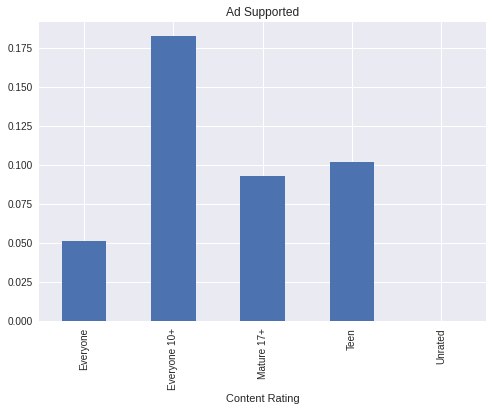

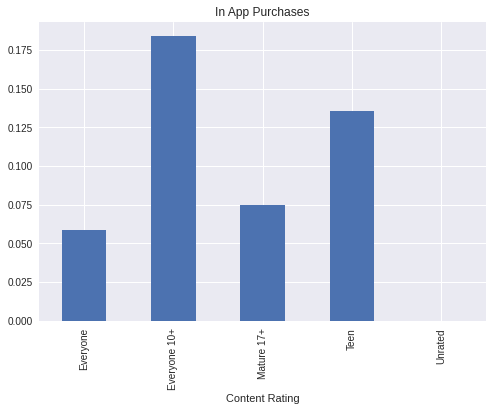

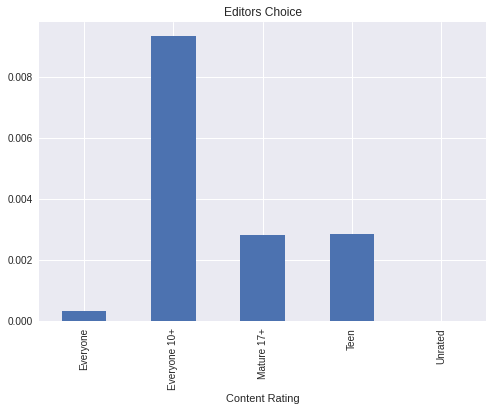

In [33]:
plt.style.use("seaborn")
df = org_df[org_df["Free"] == False].groupby("Content Rating").agg("mean")#.plot(kind="bar")
for col in df.columns:
    df[col].plot(kind="bar")
    plt.title(col)
    plt.show()

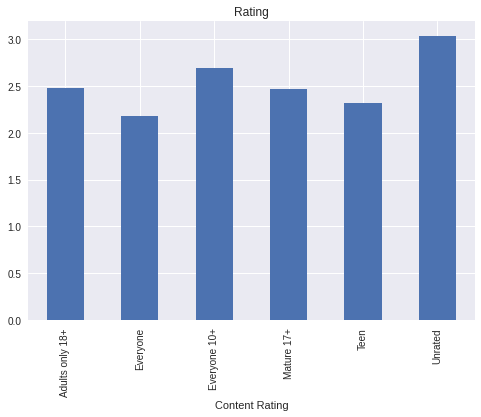

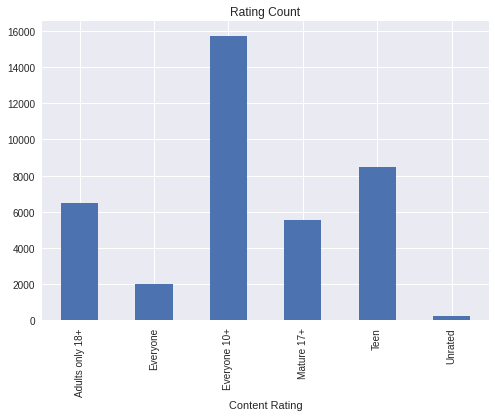

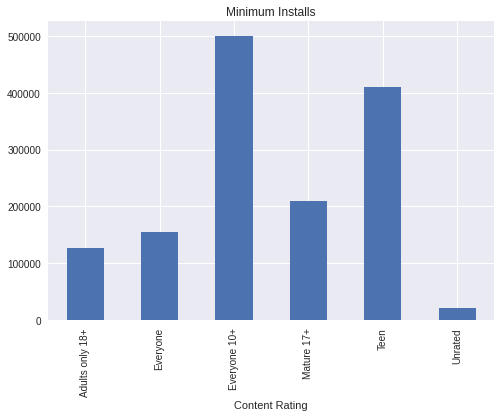

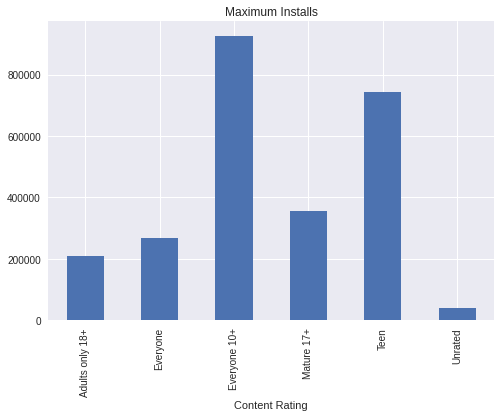

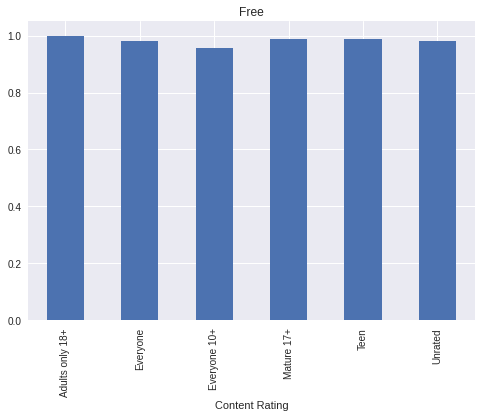

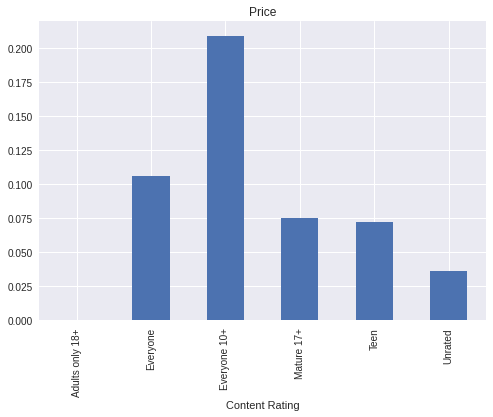

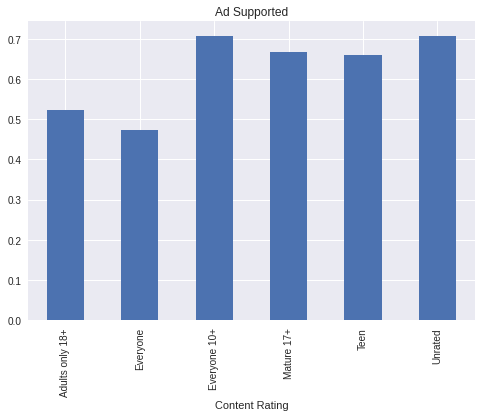

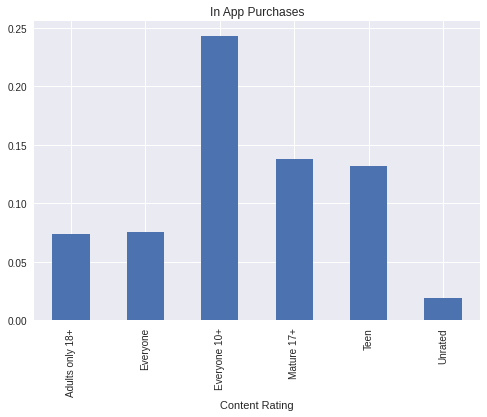

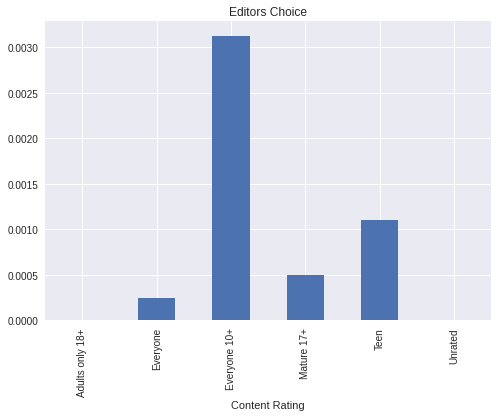

In [34]:
plt.style.use("seaborn")
df = org_df.groupby("Content Rating").agg("mean")#.plot(kind="bar")
for col in df.columns:
    df[col].plot(kind="bar")
    plt.title(col)
    plt.show()

In [35]:
org_df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

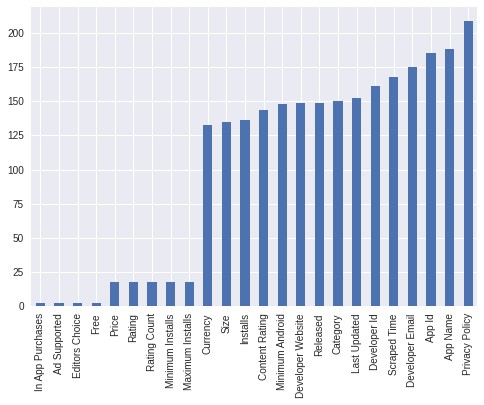

In [36]:
memory_usage = (org_df.memory_usage(index=False, deep=True)/(1024*1024)).sort_values().plot(kind ="bar")

## Modeling

### Preparation

In [37]:
data = slim_org_df.copy()

data['Category'] = pd.factorize(data['Category'])[0].astype(int)
data['Minimum Android'] = pd.factorize(data['Minimum Android'])[0].astype(int)
data['Developer Id'] = pd.factorize(data['Developer Id'])[0].astype(int)
data['Content Rating'] = pd.factorize(data['Content Rating'])[0].astype(int)
data['Ad Supported'] = pd.factorize(data['Ad Supported'])[0].astype(int)
data['In App Purchases'] = pd.factorize(data['In App Purchases'])[0].astype(int)
data['success_metric'] = pd.factorize(data['success_metric'])[0].astype(int)
train_strat, test_strat = train_test_split(data, test_size=0.2, random_state=42, stratify=slim_org_df["success_metric"])



In [38]:
data.corr()

,Category,Price,Size,Minimum Android,Developer Id,Content Rating,Ad Supported,In App Purchases,success_metric
Category,1.000000,-0.003453,0.118041,0.005496,-0.011274,0.054309,0.103710,0.095933,0.048668
Price,-0.003453,1.000000,0.004638,0.008890,-0.003014,-0.000961,-0.033787,-0.002696,-0.012815
Size,0.118041,0.004638,1.000000,-0.061116,0.026471,0.045753,-0.048017,0.181420,0.080521
Minimum Android,0.005496,0.008890,-0.061116,1.000000,-0.010708,-0.026906,-0.020452,-0.012341,0.022548
Developer Id,-0.011274,-0.003014,0.026471,-0.010708,1.000000,-0.023291,-0.201082,0.020382,-0.007958
Content Rating,0.054309,-0.000961,0.045753,-0.026906,-0.023291,1.000000,0.113038,0.077449,0.060165
Ad Supported,0.103710,-0.033787,-0.048017,-0.020452,-0.201082,0.113038,1.000000,0.132949,0.201114
In App Purchases,0.095933,-0.002696,0.181420,-0.012341,0.020382,0.077449,0.132949,1.000000,0.205659
success_metric,0.048668,-0.012815,0.080521,0.022548,-0.007958,0.060165,0.201114,0.205659,1.000000


In [39]:
train_strat


,Category,Price,Size,Minimum Android,Developer Id,Content Rating,Ad Supported,In App Purchases,success_metric
1461145,14,0.0,14680064.0,11,540713,0,1,0,1
104370,25,0.0,9961472.0,5,12247,0,0,0,0
512464,12,0.0,11534336.0,5,1428,0,0,0,0
1506170,25,0.0,3774873.6,7,183084,0,1,0,1
1111743,2,0.0,6291456.0,6,338793,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2169380,13,0.0,2411724.8,7,279886,0,1,0,0
666064,6,0.0,7864320.0,5,50595,0,1,0,0
1421276,25,0.0,3670016.0,1,240451,0,1,0,0
224947,6,0.0,7864320.0,6,801,1,1,0,0


In [40]:
X_train = train_strat.drop(["success_metric"], axis=1).copy()
y_train = train_strat["success_metric"].copy() 

X_test = test_strat.drop(["success_metric"], axis=1).copy()
y_test = test_strat["success_metric"].copy() 


In [41]:
import xgboost
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
import lightgbm 
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
cat_pipeline = Pipeline([
                          ('encoder',OneHotEncoder())
                          ])

# num_pipeline = Pipeline([
#                           ('StandardScaler',StandardScaler())
#                           ])
                          
# cat_transformer = ColumnTransformer([
#                           ('cat_trans', cat_pipeline, cat_cols)], 
#                           )


# num_transformer = ColumnTransformer([
#                             ('num_trans', num_pipeline, num_cols)], 
#                             remainder='passthrough')

pipe = Pipeline([
    #('imputer',              SimpleImputer(strategy='median')),
    #('num_categorical',      num_transformer),
    #('cat_categorical',      cat_transformer),
    ('model',                LogisticRegression())
], verbose=2)

param_grid = [
  # {
  #   'model': [DecisionTreeClassifier(class_weight="balanced")],
  #   'model__max_depth':[2,5, 10],
  # },
  {
    'model': [
              #XGBClassifier(),
              #DecisionTreeClassifier(class_weight="balanced"),
              #GradientBoostingClassifier(),
              #CatBoostClassifier(),
              LGBMClassifier()
              #LogisticRegression(penalty="l2", solver="lbfgs"),
              #SVC(kernel="linear")
              ],
  },
  # {
  #   'model': [GradientBoostingClassifier()],
  #   'model__learning_rate':[0.1, 1, 10],
  #   'model__max_depth':[2,5 , 10],
  #   'model__n_estimators':[100, 150, 50]
  # },
  # {
  #   'model': [XGBClassifier()],
  #   'model__learning_rate':[0.1],

  #   'model__max_depth':[2, 5 , 10],
  #   'model__n_estimators':[100, 150]  
  # },
  # {
  #       'model':[CatBoostClassifier()],
  #       'model__loss_function' : ['Logloss'],
  #       'model__depth': [6],
  #       'model__grow_policy' : ['SymmetricTree'],
  #       'model__learning_rate': [0.1],
  #       'model__l2_leaf_reg' : [0.2],
  #       'model__random_state': [0]
  # }
]


scorer = make_scorer(roc_auc_score)

clf_grid = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring="roc_auc_ovr", cv=2, verbose=2)

In [ ]:
clf_grid.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[Pipeline] ............. (step 1 of 1) Processing model, total=   9.1s
[CV] END .............................model=LGBMClassifier(); total time=  13.6s
[Pipeline] ............. (step 1 of 1) Processing model, total=   8.9s


In [ ]:
pd.DataFrame(clf_grid.cv_results_).to_csv("lgbm_results.csv")

In [ ]:
cv_results_df  = pd.DataFrame(clf_grid.cv_results_)

In [ ]:
cv_results_df

In [ ]:
import catboost
from catboost import CatBoostClassifier

train_strat, test_strat = train_test_split(data, test_size=0.2, random_state=42, stratify=slim_org_df["success_metric"])

X = train_strat.drop(["success_metric"], axis=1).copy()
y = train_strat["success_metric"].copy() 

def run_dta_catboost(trial, data=X,target=y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=42)

    param = { 
        #'n_estimators': trail.suggest_int[200, 500],
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'max_depth' : trial.suggest_int("max_depth", 1, 20),
        'criterion' :trial.suggest_categorical('criterion',['gini', 'entropy']),
    }

    
    clf = RandomForestClassifier(**param)  
    # clf.fit(X_train, y_train,
    #         eval_set=[(X_valid, y_valid), (X_train, y_train)],
    #         #cat_features=[5, 8, 11],
    #        )
    clf.fit(X_train, y_train)
    #clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid), (X_train, y_train)], verbose=0, early_stopping_rounds=100)

    y_proba = clf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_proba)
    return auc 
# cat_study_obj = optuna.create_study(direction='maximize')
# cat_study_obj.optimize(run_dta_catboost, n_trials=100)
# cat_study_obj.best_params   

In [ ]:
import catboost
from catboost import CatBoostClassifier

train_strat, test_strat = train_test_split(data, test_size=0.2, random_state=42, stratify=slim_org_df["success_metric"])

X = train_strat.drop(["success_metric"], axis=1).copy()
y = train_strat["success_metric"].copy() 

def run_dta_catboost(trial, data=X,target=y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=42)
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
        'eval_metric':'AUC',
        'learning_rate':trial.suggest_float("learning_rate", 0.01, 0.1),
        #'gamma': trial.suggest_float("gamma", 0, 2),
        #'reg_alpha':trial.suggest_float("reg_alpha", 0, 1),
        'reg_lambda':trial.suggest_float("reg_lambda", 0, 2),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)


    
    clf = CatBoostClassifier(**param)  
    # clf.fit(X_train, y_train,
    #         eval_set=[(X_valid, y_valid), (X_train, y_train)],
    #         #cat_features=[5, 8, 11],
    #        )
    clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid), (X_train, y_train)], verbose=0, early_stopping_rounds=100)

    y_proba = clf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_proba)
    return auc 
# cat_study_obj = optuna.create_study(direction='maximize')
# cat_study_obj.optimize(run_dta_catboost, n_trials=100)
# cat_study_obj.best_params   

In [ ]:
import lightgbm as lgbm

train_strat, test_strat = train_test_split(data, test_size=0.2, random_state=42, stratify=slim_org_df["success_metric"])

X = train_strat.drop(["success_metric"], axis=1).copy()
y = train_strat["success_metric"].copy() 

def run_dta(trial, data=X,target=y):
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.10, random_state=42)
    
    params = {
                'metric': 'auc', 
                'random_state': 22,
                'n_estimators': 4000,
                'boosting_type': trial.suggest_categorical("boosting_type", ["gbdt"]),
                'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 10.0),
                'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 10.0),
                'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
                'bagging_fraction': trial.suggest_categorical('bagging_fraction', [0.6, 0.7, 0.80]),
                'feature_fraction': trial.suggest_categorical('feature_fraction', [0.6, 0.7, 0.80]),
                'learning_rate': trial.suggest_categorical('learning_rate', [0.005, 0.01, 0.02, 0.03, 0.05, 0.1]),
                'max_depth': trial.suggest_int('max_depth', 2, 12, step=1),
                'num_leaves' : trial.suggest_int('num_leaves', 13, 148, step=5),
                'min_child_samples': trial.suggest_int('min_child_samples', 1, 96, step=5),
                'reg_alpha': trial.suggest_float('reg_alpha', 0, 100, step=1),
            }
    
    clf = LGBMClassifier(**params)  
    clf.fit(X_train, y_train,
            eval_set=[(X_valid, y_valid), (X_train, y_train)],
            #categorical_feature=[5, 8, 11],
            callbacks=[ 
                       lgbm.early_stopping(stopping_rounds=100)
                      ],
           )
    y_proba = clf.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, y_proba)
    return auc    

# study_obj = optuna.create_study(direction='maximize')
# study_obj.optimize(run_dta, n_trials=100)
# study_obj.best_params

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
preds = []
stratified_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_strat, test_strat = train_test_split(data, test_size=0.2, random_state=42, stratify=slim_org_df["success_metric"])

X = train_strat.drop(["success_metric"], axis=1).copy()
y = train_strat["success_metric"].copy() 
X_test=test_strat.drop(["success_metric"], axis=1).copy()
cat_model = CatBoostClassifier()#**cat_study_obj.best_params)
rf = RandomForestClassifier()
estimators = [('cat', cat_model), ('rf',rf)]
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=3)
model.fit(X_train, y_train)



# for fold, (train_idx, val_idx) in enumerate(stratified_fold.split(X, y)):
    
#     X_train, X_valid = X.iloc[train_idx], X.iloc[val_idx]
#     y_train , y_valid = y.iloc[train_idx], y.iloc[val_idx]

#     cat_model = CatBoostClassifier()#**cat_study_obj.best_params)
#     rf = RandomForestClassifier()
#     #lgbm_model = lgbm.LGBMClassifier(**optuna_lgbm_tuned_best_params)#**study_obj.best_params)
#     estimators = [('cat', cat_model), ('rf',rf)]
#     model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),cv=3)

#     model.fit(X_train, y_train)
#     preds.append(model.predict_proba(X_test)[:,1])
# preds = np.mean(np.column_stack(preds), axis=1) 



In [ ]:
pred = model.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, pred[:, 1])